In [55]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [57]:
# Load data
data_dir = r"C:\Users\Sherlyna Alfelia\Documents\KULIAH\SMT 5\ML\TUBES_UAS\train_data"
data = tf.keras.utils.image_dataset_from_directory(data_dir, seed=123, image_size=(180, 180))

print(data.class_names)

class_names = data.class_names  # ['Busuk', 'Matang', 'Mentah']

Found 301 files belonging to 3 classes.
['Busuk', 'Matang', 'Mentah']


In [76]:
data_dir = r"C:\Users\Sherlyna Alfelia\Documents\KULIAH\SMT 5\ML\TUBES_UAS\train_data"
img_size = 180
batch = 32
validation_split = 0.1

# Membagi dataset menjadi train dan validation
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,
    validation_split=validation_split,
    subset="training"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,
    validation_split=validation_split,
    subset="validation"
)

# Cek jumlah gambar
print("Total Images: ", len(train_ds) * batch + len(val_ds) * batch)
print("Train Images: ", len(train_ds) * batch)
print("Validation Images: ", len(val_ds) * batch)



Found 301 files belonging to 3 classes.
Using 271 files for training.
Found 301 files belonging to 3 classes.
Using 30 files for validation.
Total Images:  320
Train Images:  288
Validation Images:  32


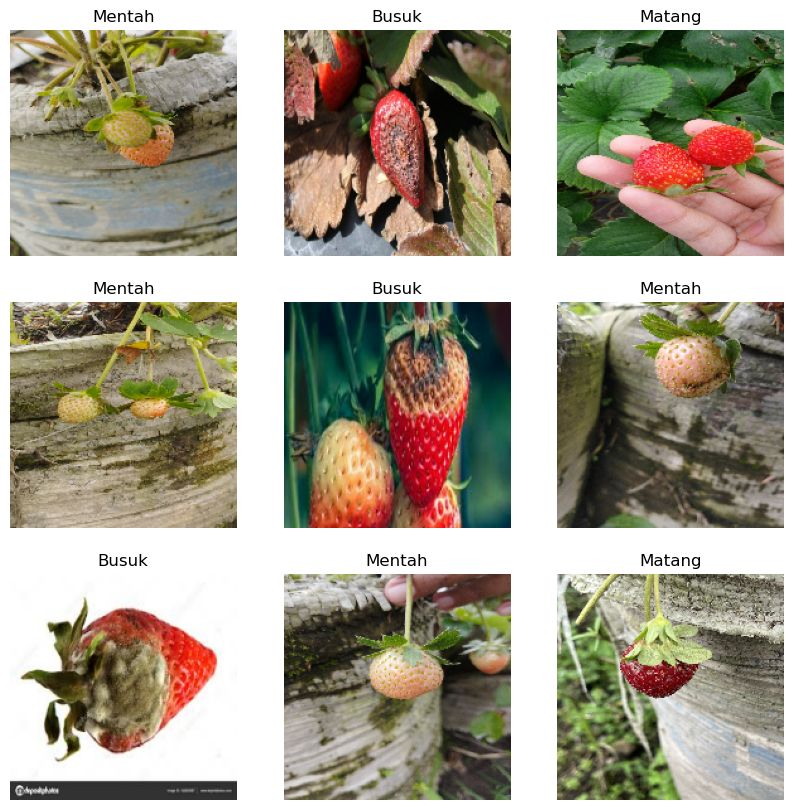

In [77]:
# Visualisasi data
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
plt.show()

In [78]:
# Preprocessing dataset
Tuner = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=Tuner)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=Tuner)

c:\anac\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


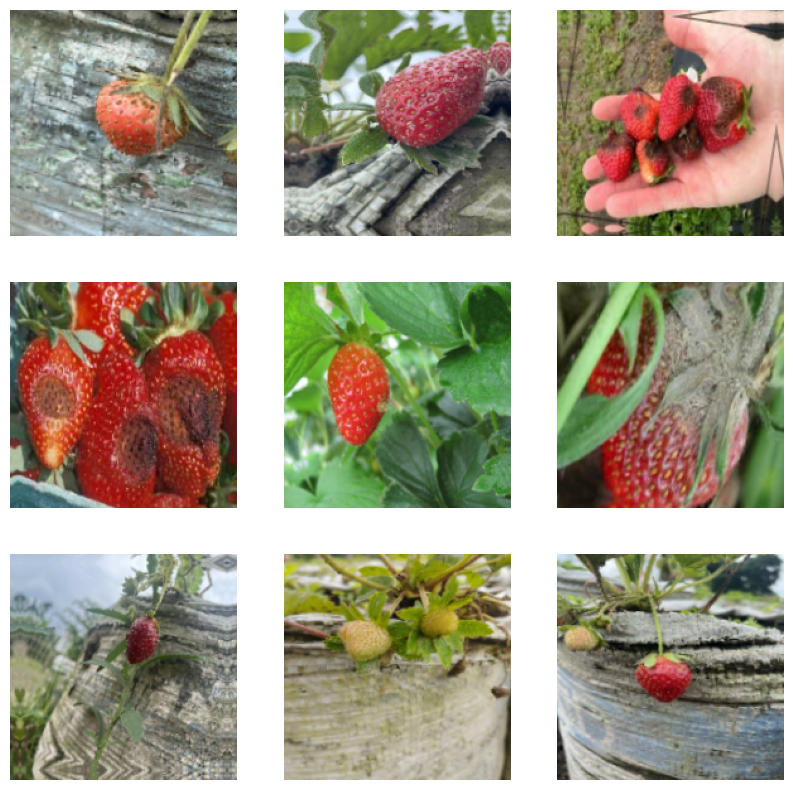

In [79]:
# Augmentasi data
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Lihat data setelah di augmentasi
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    augmented_images = data_augmentation(images)
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype('uint8'))
        plt.axis('off')
plt.show()

In [117]:
from tensorflow.keras import layers, models

# Membuat model AlexNet dengan Batch Normalization
def alexnet(input_shape, n_classes):
    model = models.Sequential()
    
    # Layer 1
    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    
    # Layer 2
    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    
    # Layer 3
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    
    # Layer 4
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    
    # Layer 5
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    
    # Flatten dan Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(n_classes, activation='softmax'))
    
    return model

# Pastikan input shape dan jumlah kelas sesuai
input_shape = (180, 180, 3)
n_classes = len(class_names)

In [118]:
# Clear Cache Keras menggunakan clear session
tf.keras.backend.clear_session()

# Buat model
model = alexnet(input_shape, n_classes)
model.summary()

c:\anac\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 43, 43, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 43, 43, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 21, 21, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10, 10, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,327,619 (142.39 MB)

 Trainable params: 37,324,867 (142.38 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [119]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Compile dengan optimizer Adam
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [120]:
# Buat early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')

# Fit validation data ke dalam model
history = model.fit(train_ds, 
                    epochs=30, 
                    validation_data=val_ds, 
                    callbacks=[early_stopping])

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.4080 - loss: 109.9298
Epoch 2/30


c:\anac\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
c:\anac\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 894ms/step - accuracy: 0.4332 - loss: 78.5367
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 872ms/step - accuracy: 0.5318 - loss: 64.9256
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 824ms/step - accuracy: 0.5239 - loss: 58.5072
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 842ms/step - accuracy: 0.6050 - loss: 51.3457
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 855ms/step - accuracy: 0.6548 - loss: 45.0703
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 906ms/step - accuracy: 0.6395 - loss: 41.0658
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 963ms/step - accuracy: 0.6824 - loss: 36.7263
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 855ms/step - accuracy: 0.6978 - loss: 33.6807
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 864ms/step - accuracy: 0.7614 - loss: 28.9888
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 847ms/step - accuracy: 0.7177 - loss: 25.9854
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 960ms/step - accuracy: 0.7938 - loss: 23.6791
Epoch 13/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 844ms/step - accuracy: 0.7513 - l

dict_keys(['accuracy', 'loss'])


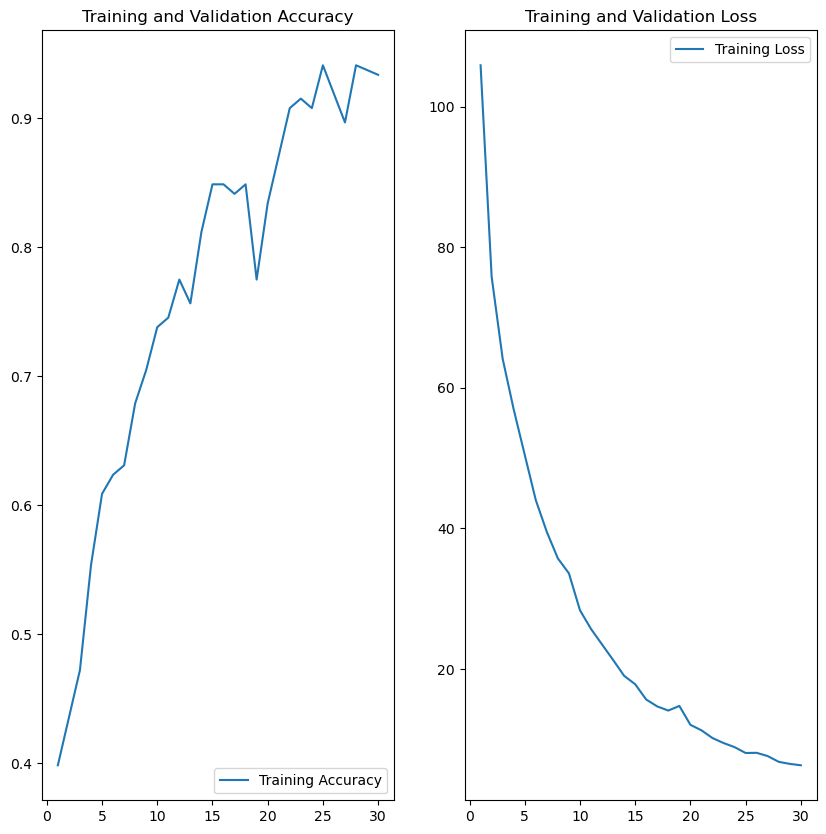

In [121]:
# Cek kunci dalam history
print(history.history.keys())

# Rentang epoch
epochs_range = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(10, 10))

# Subplot untuk akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')

# Sesuaikan berdasarkan kunci yang ditemukan
if 'val_accuracy' in history.history:
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
elif 'val_acc' in history.history:
    plt.plot(epochs_range, history.history['val_acc'], label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Subplot untuk loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')

# Sesuaikan untuk loss validasi
if 'val_loss' in history.history:
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
elif 'val_loss' in history.history:
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [123]:
model.save('BestModel_AlexNet_Matplotlib.h5')

In [135]:
from tensorflow.keras.models import load_model
from PIL import Image

# Load the trained model
model = load_model(r'C:\Users\Sherlyna Alfelia\Documents\KULIAH\SMT 5\ML\TUBES_UAS\BestModel_AlexNet_Matplotlib.h5')  # Ganti dengan path model Anda
class_names = ['Busuk', 'Matang', 'Mentah']

# Function to classify images and save the original image
def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        # Load and preprocess the image
        input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)  # Add batch dimension

        # Predict
        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100

        # Display prediction and confidence in notebook
        print(f"Prediksi: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        # Save the original image (without text)
        input_image = Image.open(image_path)
        input_image.save(save_path)

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

# Contoh penggunaan fungsi
result = classify_images(r'C:\Users\Sherlyna Alfelia\Documents\KULIAH\SMT 5\ML\TUBES_UAS\test_data\Matang\matang_06.jpg', save_path='matang_06.jpg')
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
Prediksi: Matang
Confidence: 57.61%
Prediksi: Matang dengan confidence 57.61%. Gambar asli disimpan di matang_06.jpg.


Found 30 files belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step


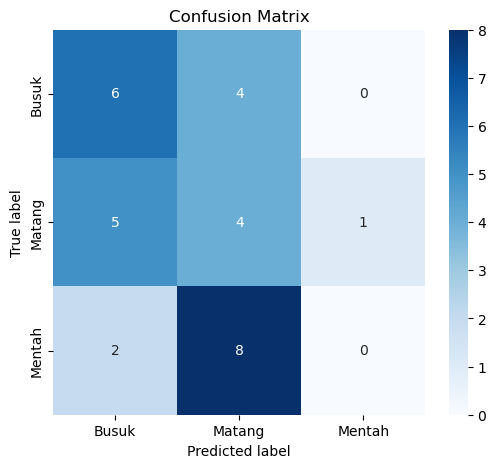

Confusion Matrix: 
 [[6 4 0]
 [5 4 1]
 [2 8 0]]
Akurasi:  0.3333333333333333
Presisi:  [0.46153846 0.25       0.        ]
Recall:  [0.6 0.4 0. ]
F1 Score:  [0.52173913 0.30769231        nan]


In [136]:
import seaborn as sns

# Muat data test yang sebenarnya
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'test_data',
    labels='inferred',
    label_mode='categorical',  # Menghasilkan label dalam bentuk one-hot encoding
    batch_size=32,
    image_size=(180, 180)
)

# Prediksi model
y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)  # Konversi ke kelas prediksi

# Ekstrak label sebenarnya dari test_data dan konversi ke bentuk indeks kelas
true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())  # Konversi one-hot ke indeks kelas
true_labels = tf.convert_to_tensor(true_labels)

# Membuat matriks kebingungan
conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

# Menghitung akurasi
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

# Menghitung presisi dan recall
precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

# Menghitung F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Busuk", "Matang", "Mentah"], yticklabels=["Busuk", "Matang", "Mentah"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Menampilkan hasil
print("Confusion Matrix: \n", conf_mat.numpy())
print("Akurasi: ", accuracy.numpy())
print("Presisi: ", precision.numpy())
print("Recall: ", recall.numpy())
print("F1 Score: ", f1_score.numpy())